# Optimasi Manajemen dan Peningkatan Efisiensi Penjadwalan Kampus UMKT dengan Metode Decision Regression Tree
## Optimasi Manajemen dan Peningkatan Efisiensi Penjadwalan Kampus UMKT dengan Metode Decision Tree Classifier

## JUDUL BARU : Klasifikasi Manajemen Penjadwalan kelas di Kampus UMKT dengan Metode Decision Tree Classifier




Menu:
1. Tambah Jadwal
2. Lihat Jadwal
3. Edit Jadwal
4. Hapus Jadwal
5. Duplikasi Jadwal
6. export data to CSV
7. export CSV to data
8. Evaluasi Machine
9. Keluar

Pilih menu (1/2/3/4/5/6/7/8/9): 8
=== Input Data ===
Data loaded successfully.

=== Preprocessing Data ===
Data preprocessing completed.

=== Feature Extraction ===
Selected features: ['year', 'month', 'day', 'id_ruangan', 'jenis_jadwal']

=== Cross-validation ===
Cross-validated Accuracy: 60.65% (±18.27)

=== Split the Data ===
Data split into training and testing sets.

=== Model Training with Decision Tree ===
Decision Tree model trained successfully.

=== Model Evaluation ===
Accuracy: 83.72%
Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.26      0.42        19
     Panjang       0.83      1.00      0.91        67

    accuracy                           0.84        86
   macro avg       0.91      0.63      0.66        86
weighted avg       0.87      0.84   

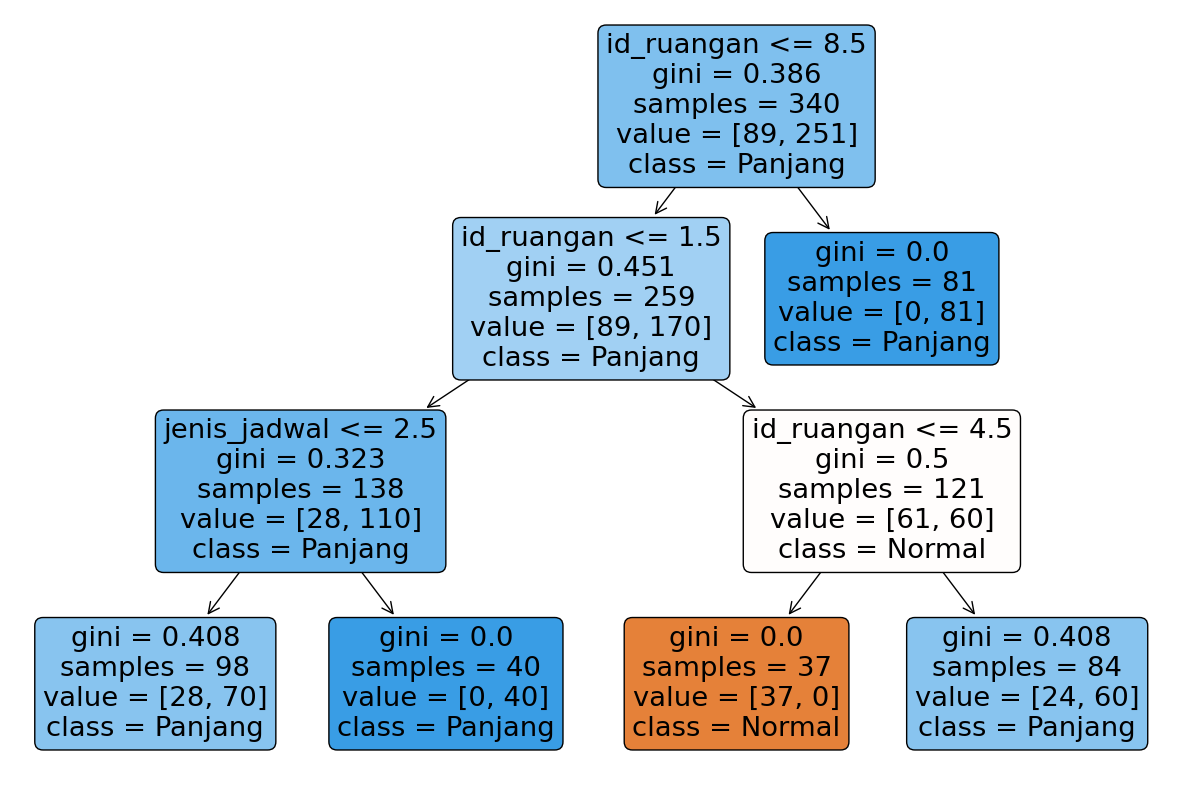

  id_jadwal id_ruangan        nama_jadwal     tanggal  tm_start tm_finish  \
0      J001     GF.101     Rapat Fakultas  2023-11-14  11:00:00  13:00:00   
1      J002     GF.101           Kalkulus  2023-11-14  08:00:00  11:00:00   
2      J003     GF.101  Dasar Pemrograman  2023-11-14  13:00:00  17:00:00   
3      J004     GF.101     Rapat Fakultas  2023-11-21  11:00:00  13:00:00   
4      J005     GF.101     Rapat Fakultas  2023-11-28  11:00:00  13:00:00   

  durasi_kelas jenis_jadwal    status_jadwal     keterangan  
0       Normal        Rapat  Dalam Pemesanan      iyah lagi  
1       Normal  Perkuliahan  Dalam Pemesanan     Determinan  
2      Panjang  Perkuliahan  Dalam Pemesanan  File Handling  
3       Normal        Rapat  Dalam Pemesanan      iyah lagi  
4       Normal        Rapat  Dalam Pemesanan      iyah lagi  

Menu:
1. Tambah Jadwal
2. Lihat Jadwal
3. Edit Jadwal
4. Hapus Jadwal
5. Duplikasi Jadwal
6. export data to CSV
7. export CSV to data
8. Evaluasi Machine
9. Keluar


In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text


from sklearn.model_selection import cross_val_score

def train_and_evaluate_decision_tree(data_jadwal):
    # ==============================
    # Input Data
    # ==============================
    
    print("=== Input Data ===")
    data = pd.read_csv(data_jadwal)
    print("Data loaded successfully.")
    
    data['tanggal'] = pd.to_datetime(data['tanggal'])
    data['tm_start'] = pd.to_datetime(data['tm_start'], format='%H:%M:%S')
    data['tm_finish'] = pd.to_datetime(data['tm_finish'], format='%H:%M:%S')

    data['durasi'] = (data['tm_finish'] - data['tm_start']).dt.total_seconds() / 60

    data['durasi_kelas'] = data['durasi'].apply(lambda x: 'Normal' if x <= 120 else 'Panjang')

    # ==============================
    # Preprocessing Data
    # ==============================
    
    print("\n=== Preprocessing Data ===")
    label_encoder = LabelEncoder()
    data['id_ruangan'] = label_encoder.fit_transform(data['id_ruangan'])
    data['jenis_jadwal'] = label_encoder.fit_transform(data['jenis_jadwal'])

    data['year'] = data['tanggal'].dt.year
    data['month'] = data['tanggal'].dt.month    
    data['day'] = data['tanggal'].dt.day

    data = data.drop(['id_jadwal', 'nama_jadwal', 'tm_start', 'tm_finish', 'durasi', 'keterangan', 'tanggal'], axis=1)
    print("Data preprocessing completed.")

    # ==============================
    # Feature Extraction
    # ==============================
    
    print("\n=== Feature Extraction ===")
    features = ['year', 'month', 'day', 'id_ruangan', 'jenis_jadwal']
    target = 'durasi_kelas'
    print("Selected features:", features)

    # ==============================
    # Cross-validation
    # ==============================
    
    print("\n=== Cross-validation ===")
    model = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)
    scores = cross_val_score(model, data[features], data[target], cv=5)  # Change cv value as needed
    print(f"Cross-validated Accuracy: {scores.mean() * 100:.2f}% (±{scores.std() * 100:.2f})")

    # ==============================
    # Split the Data
    # ==============================
    
    print("\n=== Split the Data ===")
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)
    print("Data split into training and testing sets.")

    # ==============================
    # Model Training with Decision Tree
    # ==============================
    
    print("\n=== Model Training with Decision Tree ===")
    model.fit(X_train, y_train)
    print("Decision Tree model trained successfully.")

    # ==============================
    # Model Evaluation
    # ==============================
    
    print("\n=== Model Evaluation ===")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Perhitungan Manual kategori normal
    print("\nPerhitungan Manual kategori normal")
    TP_normal = conf_matrix[0, 0]  
    FP_normal = conf_matrix[1, 0]  
    FN_normal = conf_matrix[0, 1]  
    TN_normal = conf_matrix[1, 1]  

    accuracy_normal_manual = (TP_normal + TN_normal) / (TP_normal + FP_normal + FN_normal + TN_normal) * 100
    print(f"Manual Accuracy Calculation for Normal: {accuracy_normal_manual:.2f}%")

    precision_normal_manual = TP_normal / (TP_normal + FP_normal)
    print(f"Manual Precision Calculation for Normal: {precision_normal_manual:.2f}")

    recall_normal_manual = TP_normal / (TP_normal + FN_normal)
    print(f"Manual Recall Calculation for Normal: {recall_normal_manual:.2f}")

    f1_normal_manual = 2 * (precision_normal_manual * recall_normal_manual) / (precision_normal_manual + recall_normal_manual)
    print(f"Manual F1 Score Calculation for Normal: {f1_normal_manual:.2f}")

    # Perhitungan Manual kategori Panjang
    print("\nPerhitungan Manual kategori Panjang")
    TP = conf_matrix[1, 1]  
    FP = conf_matrix[0, 1]  
    FN = conf_matrix[1, 0]  
    TN = conf_matrix[0, 0]  

    # Akurasi
    accuracy_manual = (TP + TN) / (TP + FP + FN + TN) * 100
    print(f"Manual Accuracy Calculation: {accuracy_manual:.2f}%")

    # Presisi
    precision_manual = TP / (TP + FP)
    print(f"Manual Precision Calculation: {precision_manual:.2f}")

    # Recall
    recall_manual = TP / (TP + FN)
    print(f"Manual Recall Calculation: {recall_manual:.2f}")

    # F1 Score
    f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)
    print(f"Manual F1 Score Calculation: {f1_manual:.2f}")
    # ==============================
    # Save Comparison DataFrame to CSV
    # ==============================
    
    print("\n=== Save Comparison DataFrame to CSV ===")
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    comparison_df.to_csv('durasi_kelas_comparison.csv', index=False)
    print("Comparison DataFrame saved to 'durasi_kelas_comparison.csv'.")
    pd.set_option('display.max_rows', None)

    print("\n=== Save Comparison DataFrame to CSV ===")
    print(comparison_df)

    pd.reset_option('display.max_rows')
    
    correct_predictions = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
    total_predictions = len(comparison_df)
    accuracy = correct_predictions / total_predictions * 100
    wrong_predictions = total_predictions - correct_predictions
    print(f"\nManual Accuracy Calculation:")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Wrong Predictions: {wrong_predictions}")
    print(f"Total Predictions: {total_predictions}")
    print(f"Accuracy: {accuracy:.2f}%")

    # ==============================
    # Plot Decision Tree
    # ==============================
    
    print("\n=== Plot Decision Tree ===")
    plt.figure(figsize=(15, 10))
    plot_tree(model, feature_names=features, class_names=model.classes_.astype(str).tolist(), filled=True, rounded=True)
    plt.savefig('decision_tree.png', dpi=300)
    print("Decision Tree plot saved to 'decision_tree.png'.")
    plt.show()

    return model


def duplicate_schedule(df_latih, schedule_index, num_duplicates, days_interval):
    # Fungsi untuk menduplikasi jadwal
    original_schedule = df_latih.loc[schedule_index]
    duplicated_schedules = []

    for i in range(1, num_duplicates + 1):
        duplicated_schedule = original_schedule.copy()
        duplicated_schedule['tanggal'] = pd.to_datetime(original_schedule['tanggal']) + pd.Timedelta(days=i * days_interval)
        duplicated_schedules.append(duplicated_schedule)

    df_duplicates = pd.DataFrame(duplicated_schedules)
    df_latih = pd.concat([df_latih, df_duplicates], ignore_index=True)
    
    return df_latih

 
# Fungsi untuk melihat jadwal
def lihat_jadwal(data_jadwal):
    df = pd.DataFrame(data_jadwal)
    print(df)

def get_next_jadwal_id(data_jadwal):
    if not data_jadwal or not isinstance(data_jadwal, list):
        return "J001"

    # Filter dictionary entries
    dict_entries = [entry for entry in data_jadwal if isinstance(entry, dict)]

    if not dict_entries:
        return "J001"

    last_id = max(dict_entries, key=lambda x: x.get('id_jadwal', 'J000')).get('id_jadwal', 'J000')

    if last_id[0] == 'J' and last_id[1:].isdigit():
        last_number = int(last_id[1:])
        next_number = last_number + 1
        next_id = f"J{next_number:03d}"
        return next_id

    return "J001"


def tambah_jadwal(arr_jadwal, ruang, nm_jadwal, jenis_jd):
    id_jadwal = get_next_jadwal_id(arr_jadwal)
    print(f"Id jadwal : {id_jadwal}")
    print()

    print("Daftar Ruangan yang Tersedia:")
    for i, r in enumerate(ruang, start=1):
        print(f"{i}. {r}")

    while True:
        try:
            pilihan_ruangan = int(input("Pilih ruangan (nomor): "))
            if 1 <= pilihan_ruangan <= len(ruang):
                id_ruangan = ruang[pilihan_ruangan - 1]
                print(f"ID Ruangan yang dipilih: {id_ruangan}")
                break
            else:
                print("Nomor ruangan tidak valid. Silakan pilih nomor yang sesuai.")
        except ValueError:
            print("Masukkan nomor ruangan yang valid.")

    print()
    print("Daftar Jadwal yang Tersedia:")
    for i, r in enumerate(nm_jadwal, start=1):
        print(f"{i}. {r}")

    while True:
        try:
            pilih_jadwal = int(input("Pilih Jadwal (Nomor): "))
            if 1 <= pilih_jadwal <= len(nm_jadwal):
                if pilih_jadwal == 8:
                    nama_jadwal = input("Masukkan Nama Jadwal: ")
                    print(f"Jadwal yang dipilih: {nama_jadwal}")
                    break
                nama_jadwal = nm_jadwal[pilih_jadwal-1]
                print(f"Jadwal yang dipilih: {nama_jadwal}")
                break
            else:
                print("Nomor yang pilih tidak valid, Silahkan pilih lagi.")

        except ValueError:
            print("Pilihan tidak valid.")
            nama_jadwal = ""

    print()
    tanggal = input("Masukkan Tanggal (YYYY-MM-DD): ")
    waktu_mulai = input("Masukkan Jam Mulai (HH:MM:SS): ")
    waktu_akhir = input("Masukkan Jam Selesai (HH:MM:SS): ")

    tanggal_dt = datetime.strptime(tanggal, "%Y-%m-%d")
    waktu_mulai_dt = datetime.combine(tanggal_dt.date(), datetime.strptime(waktu_mulai, "%H:%M:%S").time())
    waktu_akhir_dt = datetime.combine(tanggal_dt.date(), datetime.strptime(waktu_akhir, "%H:%M:%S").time())
    delta = waktu_akhir_dt - waktu_mulai_dt
    rentang_waktu = delta.total_seconds() / 3600

    tm_start = datetime.strptime(waktu_mulai, "%H:%M:%S").time()
    tm_finish = datetime.strptime(waktu_akhir, "%H:%M:%S").time()

    jadwal_sama_ruangan_tanggal = [jadwal for jadwal in arr_jadwal if jadwal['id_ruangan'] == id_ruangan and jadwal['tanggal'] == tanggal]

    for jadwal in jadwal_sama_ruangan_tanggal:
        jadwal_mulai = datetime.strptime(str(jadwal['tm_start']), "%H:%M:%S").time()
        jadwal_akhir = datetime.strptime(str(jadwal['tm_finish']), "%H:%M:%S").time()

        if (tm_start < jadwal_akhir) and (tm_finish > jadwal_mulai):
            id_jadwal = jadwal['id_jadwal']
            print(f"Jadwal bertabrakan dengan jadwal {id_jadwal}")
            print("Silahkan input ulang.")

            while True:
                try:
                    print("Daftar Ruangan yang Tersedia:")
                    for i, r in enumerate(ruang, start=1):
                        print(f"{i}. {r}")
                    pilihan_ruangan = int(input("Pilih ruangan (nomor): "))
                    if 1 <= pilihan_ruangan <= len(ruang):
                        id_ruangan = ruang[pilihan_ruangan - 1]
                        print(f"ID Ruangan yang dipilih: {id_ruangan}")
                        break
                    else:
                        print("Nomor ruangan tidak valid. Silakan pilih nomor yang sesuai.")
                except ValueError:
                    print("Masukkan nomor ruangan yang valid.")

            print()
            tanggal = input("Masukkan Tanggal (YYYY-MM-DD): ")
            waktu_mulai = input("Masukkan Jam Mulai (HH:MM:SS): ")
            waktu_akhir = input("Masukkan Jam Selesai (HH:MM:SS): ")

            tanggal_dt = datetime.strptime(tanggal, "%Y-%m-%d")
            waktu_mulai_dt = datetime.combine(tanggal_dt.date(), datetime.strptime(waktu_mulai, "%H:%M:%S").time())
            waktu_akhir_dt = datetime.combine(tanggal_dt.date(), datetime.strptime(waktu_akhir, "%H:%M:%S").time())
            delta = waktu_akhir_dt - waktu_mulai_dt
            rentang_waktu = delta.total_seconds() / 3600
            status_jadwal = "Tabrakan"
        else:
            status_jadwal = "Dalam Pemesanan"
            print("Jadwal tersedia, tidak ada tabrakan.")

    if rentang_waktu > 3:
        kategori_durasi = "Panjang"
    elif 1 <= rentang_waktu <= 3:
        kategori_durasi = "Normal"
    else:
        kategori_durasi = "Pendek"

    print()
    print("Daftar Jenis Jadwal yang Tersedia:")
    for i, r in enumerate(jenis_jd, start=1):
        print(f"{i}. {r}")

    while True:
        try:
            jenis_jadwal = int(input("Pilih Jenis jadwal (Nomor): "))
            if 1 <= jenis_jadwal <= len(jenis_jd):
                if jenis_jadwal == 8:
                    jenis_jadwal = input("Inputkan Kategori jadwal:")
                    print(f"Jadwal yang dipilih: {jenis_jadwal}")
                    break
                jenis_jadwal = jenis_jd[jenis_jadwal-1]
                print(f"Jadwal yang dipilih: {jenis_jadwal}")
                break
            else:
                print("Nomor yang pilih tidak valid, Silahkan pilih lagi.")

        except ValueError:
            print("Pilihan tidak valid.")

    
    status_jadwal = "Dalam Pemesanan"
    keterangan = input("Masukkan Keterangan anda: ")

    if keterangan == "":
        keterangan = "-"

    jadwal_dict = {
        'id_jadwal': id_jadwal,
        'id_ruangan': id_ruangan,
        'nama_jadwal': nama_jadwal,
        'tanggal': tanggal,
        'tm_start': tm_start,
        'tm_finish': tm_finish,
        'durasi_kelas': kategori_durasi,
        'jenis_jadwal': jenis_jadwal,
        'status_jadwal': status_jadwal,
        'keterangan': keterangan
    }

    arr_jadwal.append(jadwal_dict)
    print("Jadwal berhasil ditambahkan.")

def lihat_jadwal(arr_jadwal):
    if not arr_jadwal:
        print("Belum ada jadwal.")
    else:
        print("\nDaftar Jadwal:")
        print(f"\nNo id_jadwal - nama_jadwal - id_ruangan - tanggal - tm_start - tm_finish - durasi kelas - status_jadwal - jenis_jadwal - keterangan")

        for i, jadwal in enumerate(arr_jadwal, start=1):
            print(f"{i}. {jadwal['id_jadwal']} - {jadwal['nama_jadwal']} - {jadwal['id_ruangan']} - {jadwal['tanggal']} - {jadwal['tm_start']} - {jadwal['tm_finish']} - {jadwal['durasi_kelas']} - {jadwal['status_jadwal']} - {jadwal['jenis_jadwal']} - {jadwal['keterangan']}")

def hapus_jadwal(arr_jadwal, indeks):
    if 1 <= indeks <= len(arr_jadwal):
        removed_jadwal = arr_jadwal.pop(indeks - 1)
        print(f"Jadwal {removed_jadwal} telah dihapus.")
    else:
        print("Indeks tidak valid. Tidak ada jadwal yang dihapus.")
        
def edit_jadwal(arr_jadwal):
    daftar_kolom= [
            'id_ruangan',
            'nama_jadwal',
            'tanggal',
            'tm_start',
            'tm_finish',
            'jenis_jadwal',
            'keterangan'
    ]
    lihat_jadwal(data_jadwal_program)
    
    print("\n"*2)
    print("Edit Jadwal")
    indeks_jadwal = int(input("Masukkan indeks jadwal yang ingin diedit: "))
    if 1 <= indeks_jadwal <= len(arr_jadwal):
        # Input data baru
        jadwal = arr_jadwal[indeks_jadwal - 1]
        print("Data Jadwal yang akan diubah:")
        print(jadwal)

        pilihan = input("Apakah Anda ingin mengedit jadwal ini? (y/n): ")

        if pilihan.lower() == "y":
            print("Pilih kolom yang ingin diubah:")
            print("1. ID Ruangan")
            print("2. Nama Jadwal")
            print("3. Tanggal")
            print("4. Jam Mulai")
            print("5. Jam Selesai")
            print("6. Jenis Jadwal")
            print("7. Keterangan")

            pilihan_kolom = int(input("Pilih kolom (1-8): "))
            if 1 <= pilihan_kolom <= 8:
                # Input data baru
                if pilihan_kolom == 3:
                    data_baru = input("Masukkan Tanggal (YYYY-MM-DD): ")
                    try:
                        tanggal_baru = datetime.strptime(data_baru, "%Y-%m-%d")
                    except ValueError:
                        print("Format tanggal tidak valid.")
                elif pilihan_kolom == 4:
                    data_baru = input("Masukkan Jam Mulai (HH:MM:SS): ")
                    try:
                        waktu_mulai = datetime.strptime(data_baru, "%H:%M:%S").time()
                    except ValueError:
                        print("Format waktu tidak valid.")
                elif pilihan_kolom == 5:
                    data_baru = input("Masukkan Jam Selesai (HH:MM:SS): ")
                    try:
                        waktu_selesai = datetime.strptime(data_baru, "%H:%M:%S").time()
                    except ValueError:
                        print("Format waktu tidak valid.")

                jadwal[daftar_kolom[pilihan_kolom - 1]] = data_baru

                if pilihan_kolom == 4 or pilihan_kolom == 5:
                    waktu_mulai_lama = datetime.strptime(jadwal['tm_start'], "%H:%M:%S").time()
                    waktu_selesai = datetime.strptime(jadwal['tm_finish'], "%H:%M:%S").time()
                    delta = datetime.combine(datetime(1, 1, 1).date(), waktu_selesai) - datetime.combine(datetime(1, 1, 1).date(), waktu_mulai_lama)
                    rentang_waktu = delta.total_seconds() / 3600
                    if rentang_waktu > 3:
                        jadwal['durasi_kelas'] = "Panjang"
                    elif 1 <= rentang_waktu <= 3:
                        jadwal['durasi_kelas'] = "Normal"
                    else:
                        jadwal['durasi_kelas'] = "Pendek"
                    
                print("Jadwal berhasil diedit.")

            else:
                print("Pilihan kolom tidak valid.")
        else:
            print("Jadwal tidak diedit.")
    else:
        print("Indeks tidak valid.")
        
    return arr_jadwal


def duplikasi_jadwal(data_jadwal):
    print("Daftar Jadwal yang Tersedia:")
    for i, jadwal in enumerate(data_jadwal, start=1):
        print(f"{i}. {jadwal['nama_jadwal']} - {jadwal['id_ruangan']} - {jadwal['tanggal']} - {jadwal['tm_start']} - {jadwal['tm_finish']} - {jadwal['durasi_kelas']} - {jadwal['status_jadwal']}")

    nomor_jadwal = int(input("Pilih nomor jadwal yang ingin di-duplicate: ")) - 1
    jumlah_duplikasi = int(input("Masukkan jumlah duplikasi: "))
    interval_duplikasi = int(input("Masukkan interval duplikasi (dalam hari): "))

    jadwal_duplicated = data_jadwal[nomor_jadwal].copy()
    tanggal_awal = datetime.strptime(jadwal_duplicated['tanggal'], '%Y-%m-%d')

    for i in range(jumlah_duplikasi):
        id_jadwal = get_next_jadwal_id(data_jadwal)
        tanggal_awal += timedelta(days=interval_duplikasi)
        jadwal_duplicated['tanggal'] = tanggal_awal.strftime('%Y-%m-%d')

        tm_start = datetime.strptime(str(jadwal_duplicated['tm_start']), "%H:%M:%S").time()
        tm_finish = datetime.strptime(str(jadwal_duplicated['tm_finish']), "%H:%M:%S").time()

        jadwal_sama_ruangan_tanggal = [jadwal for jadwal in data_jadwal if jadwal['id_ruangan'] == jadwal_duplicated['id_ruangan'] and jadwal['tanggal'] == jadwal_duplicated['tanggal']]

        tabrakan = False

        for jadwal in jadwal_sama_ruangan_tanggal:
            jadwal_mulai = datetime.strptime(str(jadwal['tm_start']), "%H:%M:%S").time()
            jadwal_akhir = datetime.strptime(str(jadwal['tm_finish']), "%H:%M:%S").time()

            if (tm_start < jadwal_akhir) and (tm_finish > jadwal_mulai):
                tabrakan = True
                id_jadwal = jadwal['id_jadwal']
                print(f"Jadwal bertabrakan dengan jadwal {id_jadwal}")
                break

        if tabrakan:
            jadwal_duplicated['status_jadwal'] = "Tabrakan"
        else:
            jadwal_duplicated['status_jadwal'] = "Dalam Pemesanan"
            
        jadwal_duplicated['id_jadwal'] = id_jadwal
        data_jadwal.append(jadwal_duplicated.copy())

    print(f"{jumlah_duplikasi} jadwal berhasil di-duplicate.")
    return data_jadwal

def str_format(data_jadwal):
    data_jadwal['tanggal'] = str(data_jadwal['tanggal'])
    data_jadwal['tm_start'] = str(data_jadwal['tm_start'])
    data_jadwal['tm_finish'] = str(data_jadwal['tm_finish'])

    return data_jadwal

def str_formatcsv(data_jadwal):
    formatted_data = []
    for jadwal in data_jadwal:
        jadwal_copy = jadwal.copy()
        jadwal_copy['tanggal'] = str(jadwal_copy['tanggal'])
        jadwal_copy['tm_start'] = str(jadwal_copy['tm_start'])
        jadwal_copy['tm_finish'] = str(jadwal_copy['tm_finish'])
        formatted_data.append(jadwal_copy)
    return formatted_data

def preprocess_and_export_to_csv(data_jadwal, filename='jadwal_ruangan.csv'):
    formatted_data = str_formatcsv(data_jadwal)
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = formatted_data[0].keys()
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(formatted_data)

    print(f"Data telah diekspor ke {filename}")

def import_from_csv(filename, existing_data):
    try:
        with open(filename, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            imported_data = [row for row in reader]

        # Memeriksa ID yang sudah ada
        existing_ids = {item['id_jadwal'] for item in existing_data}
        imported_data = [item for item in imported_data if item['id_jadwal'] not in existing_ids]

        print(f"Data berhasil diimpor dari '{filename}'.")
        return imported_data
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return []


def baca_data_jadwal(nama_file):
    try:
        df = pd.read_csv(nama_file)
        return df
    except FileNotFoundError:
        print("File tidak ditemukan.")
        return None
    except pd.errors.EmptyDataError:
        print("File CSV kosong. Membuat DataFrame kosong.")
        return pd.DataFrame(columns=["id_jadwal", "id_ruangan", "nama_jadwal", "tanggal", "tm_start", "tm_finish", "durasi_kelas", "jenis_jadwal", "status_jadwal", "keterangan"])


    
# Inisialisasi array untuk menyimpan jadwal
data_jadwal_program = [
    
]

nm_jadwal=[
    "Kalkulus",
    "Sistem Digital dan Arsitektur Komputer",
    "Rapat Fakultas",
    "Dasar Pemrograman",
    "Praktikum Dasar Pemrograman",
    "Aljabar Linear",
    "Rapat Prodi",
    "Costume",
]

jenis_jd = [
    "Perkuliahan",
    "Rapat",
    "Event",
    "Kerja kelompok",
    "Seminar",
    "Costume",
]

ruang = [
    "GF.101",
    "GF.102",
    "GF.103",
    "GF.Lab-Software",
    "GF.201",
    "GF.202",
    "GF.203",
    "GF.204",
    "GF.301",
    "GF.302",
    "GF.303",
    "GF.304",
    "GF.Lab-Hardware",
]

# Main program
menu_utama = """\nMenu:
1. Tambah Jadwal
2. Lihat Jadwal
3. Edit Jadwal
4. Hapus Jadwal
5. Duplikasi Jadwal
6. export data to CSV
7. export CSV to data
8. Evaluasi Machine
9. Keluar
"""

def main():
    data = 'jadwal_ruangan.csv'

    data_jadwal = baca_data_jadwal(data)
    
    while True:
        print(menu_utama)
        pilihan = input("Pilih menu (1/2/3/4/5/6/7/8/9): ")

        if pilihan == "1":
            tambah_jadwal(data_jadwal_program, ruang, nm_jadwal, jenis_jd)

        elif pilihan == "2":
            lihat_jadwal(data_jadwal_program)

        elif pilihan == "3":
            data_jadwal = edit_jadwal(data_jadwal_program)

        elif pilihan == "4":
            lihat_jadwal(data_jadwal_program)
            indeks_hapus = input("Masukkan indeks jadwal yang ingin dihapus: ")
            if indeks_hapus.isdigit():
                hapus_jadwal(data_jadwal_program, int(indeks_hapus))
            else:
                print("Indeks tidak valid. Silakan masukkan angka.")

        elif pilihan == "5":
            data_jadwal = duplikasi_jadwal(data_jadwal_program)

        elif pilihan == "6":
            preprocess_and_export_to_csv(data_jadwal_program)
        
        elif pilihan == "7":
            imported_data = import_from_csv(data, data_jadwal_program)
            
            data_jadwal_program.extend(imported_data)
            print("Data setelah diimpor:")
            lihat_jadwal(data_jadwal_program)
        elif pilihan == "8":
            trained_model = train_and_evaluate_decision_tree(data)
            # Setelah proses duplikasi
            df_latih = pd.read_csv('jadwal_ruangan.csv')  # Ganti dengan nama file yang benar
            df_latih = duplicate_schedule(df_latih, schedule_index=22, num_duplicates=7, days_interval=7)
            df_latih.to_csv('jadwal_ruangan_setelah_duplikasi.csv', index=True)
            
            # Cetak DataFrame setelah duplikasi
            print(df_latih.head())

        elif pilihan == "9":
            print("Program selesai.")
            break

        else:
            print("Pilihan tidak valid. Silakan pilih menu yang sesuai.")
            
if __name__ == "__main__":
    main()

In [ ]:
import os
import csv
from flask import Flask, render_template, request, redirect, url_for
from pyzbar.pyzbar import decode
from PIL import Image
import cv2

# Inisialisasi Flask
app = Flask(__name__)

# Folder untuk menyimpan gambar yang di-upload
UPLOAD_FOLDER = 'uploads'
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Fungsi untuk mendeteksi QR Code atau Barcode
def detect_barcode_qrcode(image_path):
    # Membaca gambar menggunakan OpenCV
    image = cv2.imread(image_path)
    
    # Menggunakan pyzbar untuk mendeteksi QR Code atau Barcode
    decoded_objects = decode(image)
    
    detected_codes = []
    
    for obj in decoded_objects:
        code_data = obj.data.decode('utf-8')
        detected_codes.append({'type': obj.type, 'data': code_data})

        # Menambahkan persegi panjang dan teks ke gambar
        rect_points = obj.polygon
        if len(rect_points) == 4:
            pts = rect_points
        else:
            pts = cv2.convexHull(np.array([p for p in rect_points], dtype=np.float32))

        cv2.polylines(image, [np.int32(pts)], True, (0, 0, 255), 3)
        cv2.putText(image, f'{obj.type}: {code_data}', (obj.rect[0], obj.rect[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Menyimpan gambar yang telah diberi tanda
    output_image_path = os.path.join(UPLOAD_FOLDER, 'output_image_with_codes.jpg')
    c


# 0.863120568566631

Akurasi: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       1.0
           4       0.00      1.00      0.00       0.0
           8       1.00      0.00      0.00       1.0

    accuracy                           1.00       2.0
   macro avg       0.50      0.50      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0

Hasil Prediksi:
  Ruangan Sebenarnya Ruangan Prediksi
8               I909             E505
1               B202             A101


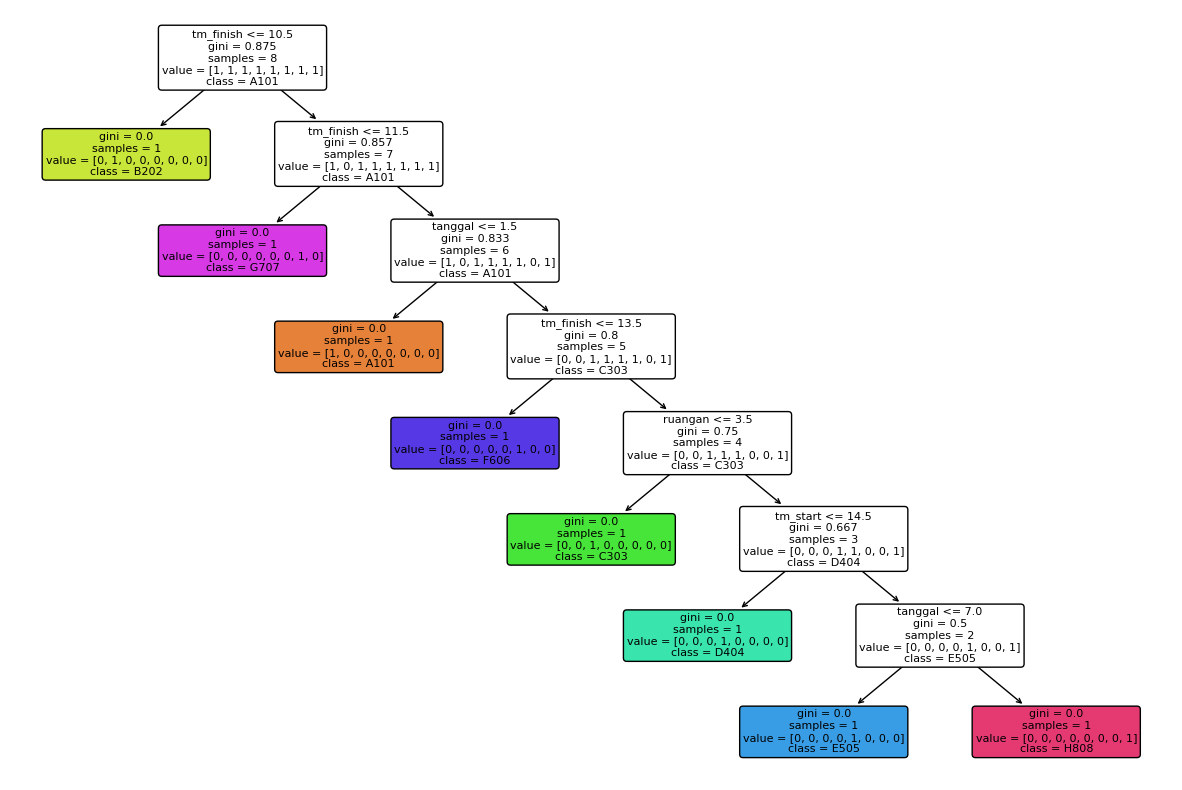

In [65]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Membuat dataset buatan (contoh)
data = {
    'id_jadwal': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'id_ruangan': ['GF-101', 'GF-102', 'GF-103', 'GF-104', 'GF-105', 'GF-106', 'GF-107', 'GF-108', 'GF-109', 'GF-110'],
    'nama_jadwal': ['Meeting1', 'Meeting2', 'Presentation1', 'Workshop1', 'Conference1', 'Seminar1', 'Meeting3', 'Presentation2', 'Workshop2', 'Conference2'],
    'tanggal': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'tm_start': [10, 11, 9, 13, 14, 15, 10, 9, 14, 15],
    'tm_finish': [12, 13, 10, 15, 16, 17, 12, 11, 16, 17],
    'rentang_waktu': [2, 2, 1, 2, 2, 2, 2, 2, 2, 2],
    'jenis_jadwal': ['Meeting', 'Meeting', 'Presentation', 'Workshop', 'Conference', 'Seminar', 'Meeting', 'Presentation', 'Workshop', 'Conference'],
    'status_jadwal': ['Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled'],
    'keterangan': ['Informal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal'],
    'ruangan': ['A101', 'B202', 'C303', 'D404', 'E505', 'F606', 'G707', 'H808', 'I909', 'J1010']
}

df = pd.DataFrame(data)

# Encode 'tanggal' and 'ruangan' columns using LabelEncoder
le = LabelEncoder()
df['tanggal'] = le.fit_transform(df['tanggal'])
df['ruangan'] = le.fit_transform(df['ruangan'])

# Memilih fitur utama untuk klasifikasi
X = df[['tanggal', 'tm_start', 'tm_finish', 'ruangan']]

# Label kelas yang akan diprediksi
y = df['ruangan']

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)  # Setting zero_division to 1

# Menampilkan hasil
print(f'Akurasi: {accuracy}')
print('Classification Report:\n', classification_rep)

# Menampilkan hasil prediksi
print('Hasil Prediksi:')
df_results = pd.DataFrame({'Ruangan Sebenarnya': y_test, 'Ruangan Prediksi': y_pred})
df_results['Ruangan Sebenarnya'] = le.inverse_transform(df_results['Ruangan Sebenarnya'])
df_results['Ruangan Prediksi'] = le.inverse_transform(df_results['Ruangan Prediksi'])
print(df_results)

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=le.classes_.tolist(), rounded=True, fontsize=8)
plt.show()

# INPUT MATA KULIAH:
### ID_MATKUL char(16) NOT NULL
### nama_matkul char(50) NOT NULL
### sks char(50) NOT NULL
### kelas char(50) NOT NULL

In [3]:
import datetime
import pandas as pd
from tabulate import tabulate


waktu_awal = datetime.datetime.now().replace(hour=8, minute=0, second=0, microsecond=0)
waktu_batas = datetime.datetime.now().replace(hour=23, minute=59, second=59, microsecond=59)

# Fungsi untuk membaca data matkul dari file CSV
def baca_data_matkul(nama_file):
    try:
        df = pd.read_csv(nama_file)
        return df
    except FileNotFoundError:
        print("File tidak ditemukan.")
        return None

# Fungsi untuk menulis data matkul ke dalam file CSV
def tulis_data_matkul(nama_file, data_matkul):
    try:
        data_matkul.to_csv(nama_file, index=False)
        print("Data matkul berhasil ditulis ke dalam file.")
    except Exception as e:
        print(f"Terjadi kesalahan: {str(e)}")

def hitung_durasi_perkuliahan(sks):
    if sks == 1:
        return 170 
    elif sks == 2:
        return 100 
    elif sks == 3:
        return 150 
    else:
        return 0 

def input_data():
    kode = input("Masukkan kode matakuliah: ")
    name = input("Masukkan Nama matakuliah: ")
    sks = int(input("Masukkan jumlah SKS matakuliah: "))
    iya = int(input("Masukkan jumlah kelas dalam satu matakuliah: "))
    if iya >= 1:
        kelas = []
        for i in range(iya):
            kumkel = input("Masukkan nama kelas: ")
            kelas.append(kumkel)
    else:
        kelas = input("Masukkan nama kelas: ")    
    
    durasi_perkuliahan = hitung_durasi_perkuliahan(sks)
    
    if durasi_perkuliahan > 0:       
        waktu_selesai = waktu_awal + datetime.timedelta(minutes=durasi_perkuliahan)
    
        if waktu_selesai <= waktu_batas:
            print(f"Jadwal perkuliahan ({sks} SKS):")
            print(f"Mulai: {waktu_awal.strftime('%H:%M')} WIB")
            print(f"Selesai: {waktu_selesai.strftime('%H:%M')} WIB")
        else:
            print("Perkuliahan melewati jam 12 malam. Batas waktu tercapai.")
            break
    
        waktu_awal = waktu_selesai + datetime.timedelta(minutes=5)
    else:
        print("Jumlah SKS tidak valid. Masukkan 1, 2, atau 3 SKS.")

    matkul = {
        "kode_matakuliah" : code,
        'nama_matkul' : name,
        "sks" : sks,
        "kelas" : kelas
    }
    matkul = matkul.append(matkul_baru, ignore_index=True)
    return matkul



# Main program
if __name__ == "__main__":
    nama_file = "matkul.csv" 

    # Baca data mata kuliah dari file CSV (jika sudah ada)
    data_matkul = baca_data_matkul(nama_file)

    if data_matkul is None:
        # Buat DataFrame kosong jika file belum ada
        data_matkul = pd.DataFrame(columns=["kode_matkul", "nama_matkul", "sks", "kelas"])

    while True:
        print("\nMenu:")
        print("1. Tambah Jadwal")
        print("2. Lihat Jadwal")
        print("3. Keluar")

        pilihan = input("Pilih menu (1/2/3): ")

        if pilihan == "1":
            data_matkul = input_data(data_matkul)
            tulis_data_matkul(nama_file, data_matkul)
        elif pilihan == "2":
            print(data_matkul)
        elif pilihan == "3":
            break
        else:
            print("Pilihan tidak valid. Silakan pilih menu yang benar.")

SyntaxError: 'break' outside loop (2450789368.py, line 68)

# Gabut hehe

In [11]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [10]:
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime
from ipywidgets import interact, interactive, fixed, interact_manual

date_picker = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

display(date_picker)

def on_date_change(change):
    if change['name'] == 'value' and change['new']:
        selected_date = change['new']
        formatted_date = selected_date.strftime('%Y-%m-%d')
        print(f"Tanggal yang dipilih: {formatted_date}")

def f(x):
    return x
    
date_picker.observe(on_date_change)
interact(f, x=10);
interact(f, x='Hi there!');

@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interact(f, x=['apples','oranges']);

interact(f, x=[('one', 10), ('two', 20)]);

DatePicker(value=None, description='Pick a Date', step=1)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…